In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.markers import MarkerStyle
import cmocean
import pandas as pd
import numpy as np
import scipy.stats as ss

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
# Suppress specific RuntimeWarning related to mean of empty slice
warnings.filterwarnings(action="ignore", category=RuntimeWarning, message=".*Mean of empty slice.*")

In [3]:
wave_energy_dissipation = pd.read_csv("../derived_data/wave_energy_dissipation.csv", index_col = 0)
wave_energy_dissipation

,lon,lat,rounded depth,rounded mab,barotropic,continuum,available E,E Error,N,N Error,coriolis frequency,eps_IGW,eps_IGW_mult_error,eps_IGW_add_error
index,,,,,,,,,,,,,,
0,-52.2870,-63.4032,299,343,0.000807,0.000353,0.000353,1.592056e-06,0.001586,0.000466,-0.000130,5.737885e-10,1.641828,3.375698e-10
1,-52.2870,-63.4032,505,137,0.000807,0.000559,0.000741,9.692530e-07,0.001135,0.000268,-0.000130,4.402297e-09,1.476335,2.082164e-09
2,-52.2870,-63.4032,614,28,0.000807,0.000645,0.000850,1.138264e-07,0.000614,0.000283,-0.000130,1.548914e-08,2.035173,1.428215e-08
3,-51.6357,-63.5145,1318,338,0.000423,0.000365,0.000476,5.356444e-07,0.001157,0.000225,-0.000131,1.764363e-09,1.377578,6.852385e-10
4,-51.6357,-63.5145,1513,143,0.000423,0.000544,0.000592,9.137856e-07,0.001206,0.000233,-0.000131,2.549531e-09,1.377235,9.862902e-10
5,-51.6357,-63.5145,1625,31,0.000423,0.000376,0.000376,1.388905e-07,0.000628,0.000297,-0.000131,2.919587e-09,2.076026,2.758180e-09
6,-50.8113,-63.6560,2143,350,0.000237,0.000313,0.000454,1.107861e-06,0.001097,0.000061,-0.000131,1.753330e-09,1.095109,1.938741e-10
7,-50.8113,-63.6560,2350,143,0.000237,0.000421,0.000563,1.375006e-06,0.001407,0.000168,-0.000131,1.780950e-09,1.220423,4.241559e-10
8,-50.0897,-63.7783,2400,357,0.000190,0.000498,0.000507,1.294270e-06,0.000972,0.000140,-0.000131,2.659811e-09,1.263843,7.662477e-10


# Min/Max of wave energy parameterization

In [4]:
print(f"{wave_energy_dissipation["N"].min():.1e}, {wave_energy_dissipation["N"].max():.1e}")
print(f"{wave_energy_dissipation["N"].min()**2:.1e}, {wave_energy_dissipation["N"].max()**2:.1e}")

6.1e-04, 2.1e-03
3.8e-07, 4.2e-06


In [5]:
for value in wave_energy_dissipation[wave_energy_dissipation["rounded mab"]<100]["N"].values:
    print(f"N = {value:.1e}, N**2 = {value**2:.1e}")

N = 6.1e-04, N**2 = 3.8e-07
N = 6.3e-04, N**2 = 3.9e-07
N = 1.1e-03, N**2 = 1.3e-06
N = 1.7e-03, N**2 = 2.8e-06
N = 1.5e-03, N**2 = 2.2e-06
N = 2.1e-03, N**2 = 4.2e-06
N = 1.5e-03, N**2 = 2.1e-06
N = 1.0e-03, N**2 = 1.1e-06


# R parameter

In [6]:
binned_neutral_density = pd.read_csv("../derived_data/binned_neutral_density.csv", index_col = 0)
binned_neutral_density.columns = binned_neutral_density.columns.astype("float") #convert column names from strings to floats
binned_neutral_density = binned_neutral_density.iloc[:600]
binned_neutral_density

,-53.5,-53.0,-52.5,-52.0,-51.5,-51.0,-50.5,-50.0,-49.5,-49.0,-48.5,-48.0,-47.5,-47.0
0,28.170081,28.215544,28.255530,28.370721,28.457256,28.468735,28.492739,28.483209,28.488579,28.471909,28.454345,28.450294,28.416108,28.410615
1,28.170353,28.215840,28.255219,28.371149,28.457358,28.468527,28.492637,28.483257,28.488768,28.472229,28.454433,28.450628,28.415712,28.410669
2,28.170272,28.215962,28.255548,28.371033,28.457402,28.468737,28.492638,28.483159,28.488715,28.471998,28.454397,28.450541,28.415126,28.410682
3,28.170306,28.215723,28.255022,28.370988,28.457095,28.468516,28.492478,28.483273,28.488602,28.471771,28.454150,28.450183,28.414168,28.410769
4,28.170032,28.215963,28.254936,28.371478,28.456902,28.468689,28.492435,28.483297,28.488689,28.471649,28.453722,28.449535,28.413573,28.410597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,NaN,NaN,27.884601,28.081410,28.236631,28.288293,28.300634,28.319382,28.325128,28.345392,28.354093,28.361075,28.369351,28.375495
596,NaN,NaN,27.880454,28.080229,28.236400,28.288228,28.300528,28.319198,28.325037,28.345364,28.353982,28.361022,28.369268,28.375597
597,NaN,NaN,27.879156,28.079340,28.235945,28.288011,28.300228,28.319186,28.324972,28.345350,28.353924,28.361040,28.369293,28.375530
598,NaN,NaN,27.877349,28.077930,28.235838,28.287932,28.300192,28.318846,28.324864,28.345209,28.353906,28.361059,28.369270,28.375437


In [7]:
mooring_lons = wave_energy_dissipation["lon"].unique()
desired_moorings = 0,1,4 # moorings A, B, E
desired_lons = np.array([mooring_lons[i] for i in desired_moorings])
desired_lons

array([-52.287 , -51.6357, -49.2682])

In [8]:
closest_lons = []
for lon in desired_lons: 
    closest_index = np.argmin(np.abs(np.array(binned_neutral_density.columns) - lon))
    closest_lon = binned_neutral_density.columns[closest_index]
    print(lon, closest_lon)
    closest_lons.append(closest_lon)

-52.287 -52.5
-51.6357 -51.5
-49.2682 -49.5


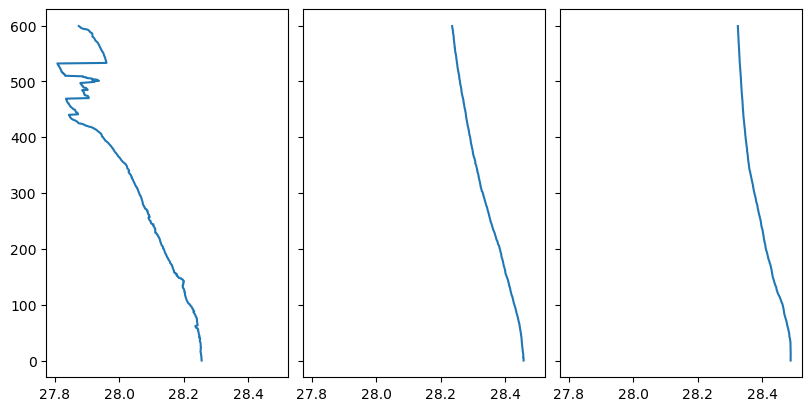

In [9]:
fig, axis = plt.subplots(ncols = 3, figsize = (8,4), layout = "constrained", sharex = True, sharey = True)
for ax, closest_lon in zip(axis, closest_lons):
    profile = binned_neutral_density[closest_lon]
    ax.plot(profile.values, profile.index)

            3             2
-5.021e-09 x - 3.375e-06 x + 0.0001102 x + 28.26 	 0.9974374178462155 

            3             2
-1.004e-09 x - 6.983e-07 x + 0.000315 x + 28.46 	 0.9989547892933095 

            3             2
-5.436e-10 x - 6.352e-08 x + 0.0004431 x + 28.5 	 0.997040199088561 



Text(0, 0.5, 'Height above bottom (m)')

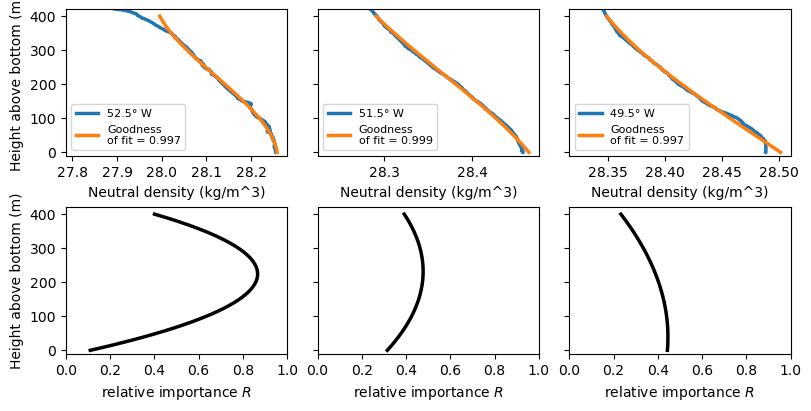

In [32]:
fig, axis = plt.subplots(ncols = 3, nrows = 2, figsize = (8,4), sharey=True,layout = "constrained")
for ax, closest_lon in zip(axis.T, closest_lons):
    profile = binned_neutral_density[closest_lon]

    #fit cubic regression model
    x = -profile[profile>28].index # depth
    y = profile[profile>28].values # density

    # coeffs = poly.Polynomial.fit(x, y, 3)
    # model = poly.Polynomial(coeffs)
    coeffs = np.polyfit(x, y, 3)
    model = np.poly1d(coeffs)
    derivative = np.polyder(model)

    #calculate r-squared
    yhat = model(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    r_squared = ssreg / sstot

    #add fitted cubic regression line to scatterplot
    polyline = np.linspace(-400, 0, 50)
    ax[0].plot(profile.values, profile.index,"-", lw = 2.5, label=f"{-closest_lon:.1f}° W")
    ax[0].plot(model(polyline), -polyline, lw = 2.5, label = f"Goodness\nof fit = {r_squared:.3f}")
    print(model, "\t",r_squared, "\n")
    ax[0].legend(fontsize=8, loc = "lower left")

    depth_resolution = 1
    density_resolution = 1e-3
    ratio = depth_resolution/density_resolution
    ax[1].plot(derivative(polyline)*ratio,-polyline, "k", lw = 2.5,)

    ax[1].set_xlim(0,1)
    ax[0].set_ylim(-10,420)
    ax[1].set_ylim(-10,420)
    ax[0].set_xlabel("Neutral density (kg/m^3)")
    ax[1].set_xlabel(r"relative importance $R$")

axis[0,0].set_ylabel("Height above bottom (m)")
axis[1,0].set_ylabel("Height above bottom (m)")